In [115]:
import pandas as pd
import numpy as np
import json
from IPython.display import display

import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
import scipy.stats as stats
import scipy.io
from scipy.spatial import distance as Distance
from scipy.stats import ttest_ind
from scipy.stats import binom_test

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

import random
random.seed(9001)

%matplotlib inline

## sklearn imports
# import sklearn.linear_model
# import sklearn.cross_validation
# import sklearn.tree
# import sklearn.ensemble
# import sklearn.preprocessing
# import sklearn.feature_selection
# import sklearn.pipeline
# import sklearn.grid_search

In [116]:
mainDir = '/Users/adam2392/Documents/MATLAB/Neural_Interaction_Lab_MatlabForPD/notebooks/processed data/'

In [117]:
clinDir = '/Users/adam2392/Documents/MATLAB/Neural_Interaction_Lab_MatlabForPD/Clinical Data/'

onFileName = 'clinicalDataOnMeds.pkl'
offFileName = 'clinicalDataOffMeds.pkl'
controlFileName = 'clinicalDataControls.pkl'

onMedsClin = pd.read_pickle(clinDir + onFileName)
offMedsClin = pd.read_pickle(clinDir + offFileName)
controlClin = pd.read_pickle(clinDir + controlFileName)

In [118]:
# load in kinect data
onFileName = 'kinectDataOnMeds.pkl'
offFileName = 'kinectDataOffMeds.pkl'
controlFileName = 'kinectDataControls.pkl'

kinectondf = pd.read_pickle(mainDir + onFileName)
kinectoffdf = pd.read_pickle(mainDir + offFileName)
kinectControldf = pd.read_pickle(mainDir + controlFileName)

In [119]:
# load in eparc data
onFileName = 'eparcDataOnMeds.pkl'
offFileName = 'eparcDataOffMeds.pkl'
controlFileName = 'eparcDataControls.pkl'

eparcondf = pd.read_pickle(mainDir + onFileName)
eparcoffdf = pd.read_pickle(mainDir + offFileName)
eparcControldf = pd.read_pickle(mainDir + controlFileName)

In [120]:
kinectondf['Velocity'].replace(0.0, np.nan, inplace=True)
kinectoffdf['Velocity'].replace(0.0, np.nan, inplace=True)
kinectControldf['Velocity'].replace(0.0, np.nan, inplace=True)

kinectondf['Hn Velocity'].replace(0.0, np.nan, inplace=True)
kinectoffdf['Hn Velocity'].replace(0.0, np.nan, inplace=True)
kinectControldf['Hn Velocity'].replace(0.0, np.nan, inplace=True)

In [121]:
display(kinectControldf.columns.values)
display(eparcControldf.columns.values)

array(['Cadence', 'Hn Step Length', 'Hn Velocity', 'Patient',
       'Step Length', 'Velocity'], dtype=object)

array([u'Subject Name', u'Trial', u'Step Width (cm)', u'Step Length (cm)',
       u'Speed (cm/s)', u'Step Length Symmetry (%)'], dtype=object)

In [122]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

def reject_outliers(data, m=2.):
    mean = np.mean(data)
    sd = np.std(data)
    thresh = mean-sd*m
    return data[data>thresh]

def z_score(data):
    mean = np.mean(data)
    sd = np.std(data)
    return (data - mean) / sd

def reject_steps(data):
    return data[data < 1.05]

# 1. Compare Similar Metrics
* Step Length to Step Length
* Velocity to Speed
* Hn Step Length -> Eparc
* Hn Velocity -> Eparc


## 1a. Compare Control Groups

Independent T-test between Kinect and EParc Control Step Length (P-Value):  2.68978371945e-29
Independent T-test between Kinect and EParc Control Velocity (P-Value):  7.72569231717e-87
Independent T-test between Kinect and EParc Control HN SL (P-Value):  3.30041301102e-70


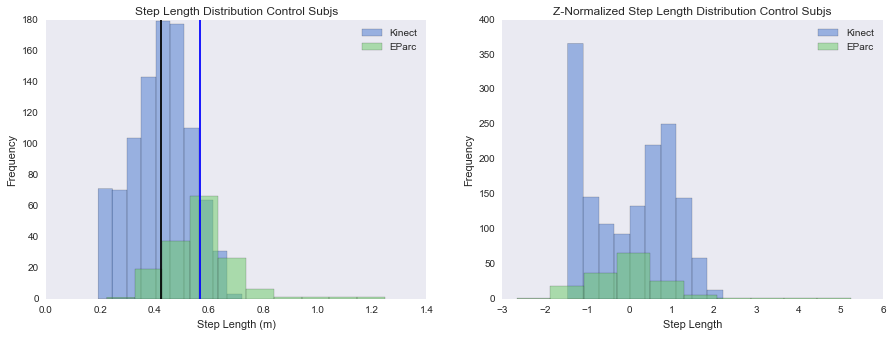

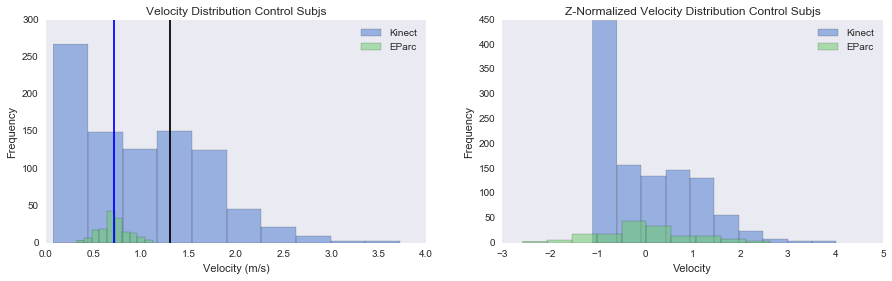

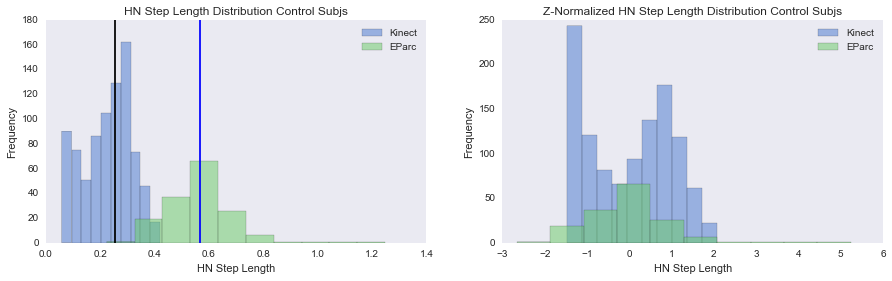

In [123]:
import sklearn.mixture
gmm = sklearn.mixture.GMM()

# kinect_steplength = reject_outliers(kinectControldf['Step Length'], 1)
kinect_steplength = kinectControldf['Step Length']
eparc_steplength = eparcControldf['Step Length (cm)'] / 100

# result
# r = gmm.fit(kinect_steplength[:, np.newaxis]) # GMM requires 2D data as of sklearn version 0.16
kinectvseparc_steplength = ttest_ind(a=reject_outliers(kinect_steplength, 0.5), b=eparc_steplength, equal_var=False)

## 1. Step Length
print "Independent T-test between Kinect and EParc Control Step Length (P-Value): ", kinectvseparc_steplength[1]

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
reject_outliers(kinect_steplength,0.5).plot.hist(alpha=0.5)
eparc_steplength.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Length (m)')
plt.title('Step Length Distribution Control Subjs')
plt.legend(['Kinect', 'EParc'])
# plt.axvline(np.mean(kinect_steplength))
# plt.axvline(np.mean(kinect_steplength) - np.std(kinect_steplength))
plt.axvline(np.mean(reject_outliers(kinect_steplength, 0.5)), color='k')
plt.axvline(np.mean(eparc_steplength), color='b')

plt.subplot(122)
z_score(kinect_steplength).plot.hist(alpha=0.5)
z_score(eparc_steplength).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Length')
plt.title('Z-Normalized Step Length Distribution Control Subjs')
plt.legend(['Kinect', 'EParc'])

## 2. Velocity
kinect_velocity = kinectControldf['Velocity']
eparc_velocity = eparcControldf['Speed (cm/s)'] / 100

kinectvseparc_velocity = ttest_ind(a=reject_outliers(kinect_velocity, 0.5), b=eparc_velocity, equal_var=False)

print "Independent T-test between Kinect and EParc Control Velocity (P-Value): ", kinectvseparc_velocity[1]

fig = plt.figure(figsize=(15,4))
plt.subplot(121)
reject_outliers(kinect_velocity,1).plot.hist(alpha=0.5)
eparc_velocity.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Velocity (m/s)')
plt.title('Velocity Distribution Control Subjs')
plt.legend(['Kinect', 'EParc'])
plt.axvline(np.mean(reject_outliers(kinect_velocity, 0.5)), color='k')
plt.axvline(np.mean(eparc_velocity), color='b')

plt.subplot(122)
z_score(kinect_velocity).plot.hist(alpha=0.5)
z_score(eparc_velocity).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Velocity')
plt.title('Z-Normalized Velocity Distribution Control Subjs')
plt.legend(['Kinect', 'EParc'])

## 3. HN Step Length
kinect_hnsteplength = kinectControldf['Hn Step Length']
eparc_hnsteplength = eparcControldf['Step Length (cm)'] / 100

kinectvseparc_hnsteplength = ttest_ind(a=reject_outliers(kinect_hnsteplength, 0.5), b=eparc_hnsteplength, equal_var=False)

print "Independent T-test between Kinect and EParc Control HN SL (P-Value): ", kinectvseparc_hnsteplength[1]

kinect_plot = kinect_hnsteplength
eparc_plot = eparc_hnsteplength

fig = plt.figure(figsize=(15,4))
plt.subplot(121)
reject_outliers(kinect_plot,1).plot.hist(alpha=0.5)
eparc_plot.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('HN Step Length')
plt.title('HN Step Length Distribution Control Subjs')
plt.legend(['Kinect', 'EParc'])
plt.axvline(np.mean(reject_outliers(kinect_plot, 0.5)), color='k')
plt.axvline(np.mean(eparc_plot), color='b')

plt.subplot(122)
z_score(kinect_plot).plot.hist(alpha=0.5)
z_score(eparc_plot).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('HN Step Length')
plt.title('Z-Normalized HN Step Length Distribution Control Subjs')
plt.legend(['Kinect', 'EParc'])

## 1b. On Meds

Independent T-test between Kinect and EParc On Meds Step Length (P-Value):  1.41373439684e-09
Independent T-test between Kinect and EParc On Meds Velocity (P-Value):  7.72569231717e-87
Independent T-test between Kinect and EParc On Meds HN SL (P-Value):  3.30041301102e-70


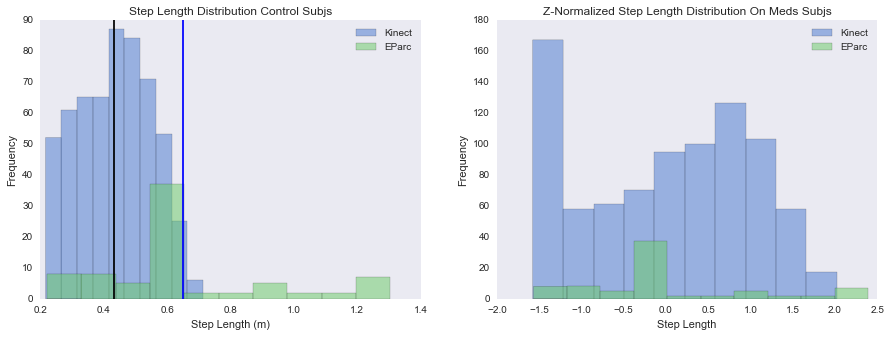

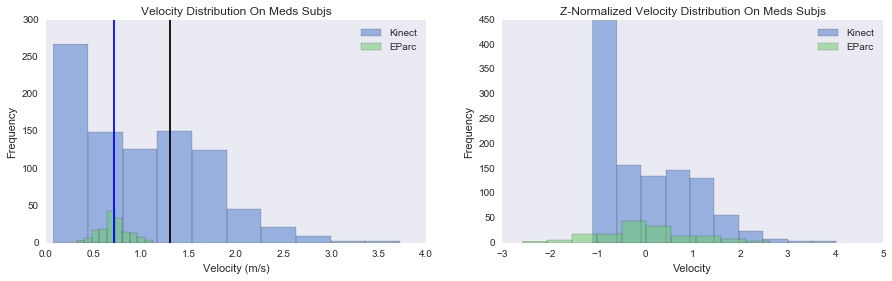

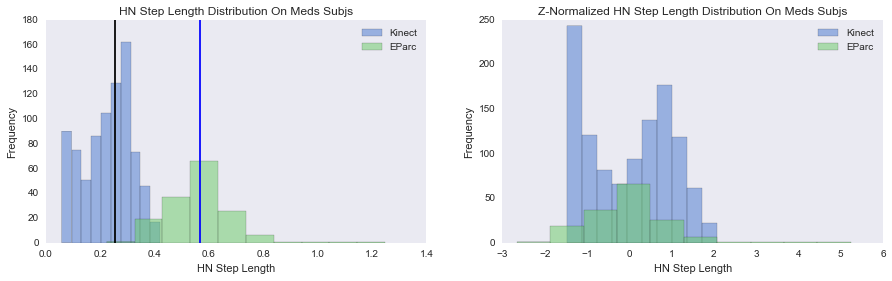

In [124]:
# kinect_steplength = reject_outliers(kinectControldf['Step Length'], 1)
kinect_steplength = kinectondf['Step Length'].dropna()
eparc_steplength = eparcondf['Step Length (cm)'].dropna() / 100

kinectvseparc_steplength = ttest_ind(a=reject_outliers(kinect_steplength, 0.5), b=eparc_steplength, equal_var=False)

## 1. Step Length
print "Independent T-test between Kinect and EParc On Meds Step Length (P-Value): ", kinectvseparc_steplength[1]

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
reject_outliers(kinect_steplength,0.5).plot.hist(alpha=0.5)
eparc_steplength.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Length (m)')
plt.title('Step Length Distribution Control Subjs')
plt.legend(['Kinect', 'EParc'])
# plt.axvline(np.mean(kinect_steplength))
# plt.axvline(np.mean(kinect_steplength) - np.std(kinect_steplength))
plt.axvline(np.mean(reject_outliers(kinect_steplength, 0.5)), color='k')
plt.axvline(np.mean(eparc_steplength), color='b')

plt.subplot(122)
z_score(kinect_steplength).plot.hist(alpha=0.5)
z_score(eparc_steplength).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Length')
plt.title('Z-Normalized Step Length Distribution On Meds Subjs')
plt.legend(['Kinect', 'EParc'])

## 2. Velocity
kinect_velocity = kinectControldf['Velocity']
eparc_velocity = eparcControldf['Speed (cm/s)'] / 100

kinectvseparc_velocity = ttest_ind(a=reject_outliers(kinect_velocity, 0.5), b=eparc_velocity, equal_var=False)

print "Independent T-test between Kinect and EParc On Meds Velocity (P-Value): ", kinectvseparc_velocity[1]

fig = plt.figure(figsize=(15,4))
plt.subplot(121)
reject_outliers(kinect_velocity,1).plot.hist(alpha=0.5)
eparc_velocity.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Velocity (m/s)')
plt.title('Velocity Distribution On Meds Subjs')
plt.legend(['Kinect', 'EParc'])
plt.axvline(np.mean(reject_outliers(kinect_velocity, 0.5)), color='k')
plt.axvline(np.mean(eparc_velocity), color='b')

plt.subplot(122)
z_score(kinect_velocity).plot.hist(alpha=0.5)
z_score(eparc_velocity).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Velocity')
plt.title('Z-Normalized Velocity Distribution On Meds Subjs')
plt.legend(['Kinect', 'EParc'])

## 3. HN Step Length
kinect_hnsteplength = kinectControldf['Hn Step Length']
eparc_hnsteplength = eparcControldf['Step Length (cm)'] / 100

kinectvseparc_hnsteplength = ttest_ind(a=reject_outliers(kinect_hnsteplength, 0.5), b=eparc_hnsteplength, equal_var=False)

print "Independent T-test between Kinect and EParc On Meds HN SL (P-Value): ", kinectvseparc_hnsteplength[1]

kinect_plot = kinect_hnsteplength
eparc_plot = eparc_hnsteplength

fig = plt.figure(figsize=(15,4))
plt.subplot(121)
reject_outliers(kinect_plot,1).plot.hist(alpha=0.5)
eparc_plot.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('HN Step Length')
plt.title('HN Step Length Distribution On Meds Subjs')
plt.legend(['Kinect', 'EParc'])
plt.axvline(np.mean(reject_outliers(kinect_plot, 0.5)), color='k')
plt.axvline(np.mean(eparc_plot), color='b')

plt.subplot(122)
z_score(kinect_plot).plot.hist(alpha=0.5)
z_score(eparc_plot).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('HN Step Length')
plt.title('Z-Normalized HN Step Length Distribution On Meds Subjs')
plt.legend(['Kinect', 'EParc'])

## 1c. Off Meds

Independent T-test between Kinect and EParc Off Meds Step Length (P-Value):  1.12538419047e-23
Independent T-test between Kinect and EParc Off Meds Velocity (P-Value):  7.72569231717e-87
Independent T-test between Kinect and EParc Off Meds HN SL (P-Value):  3.30041301102e-70


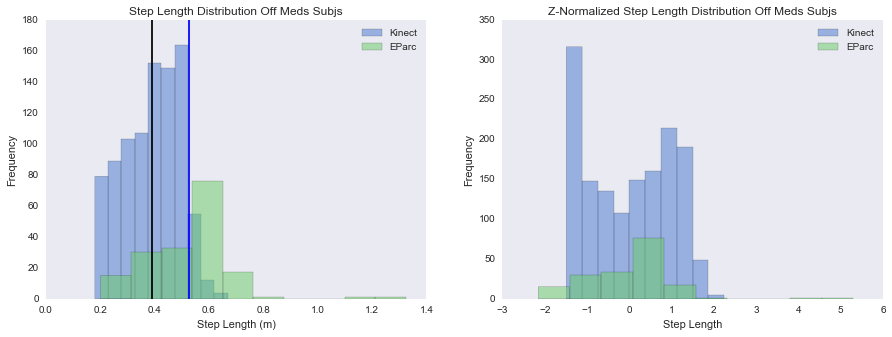

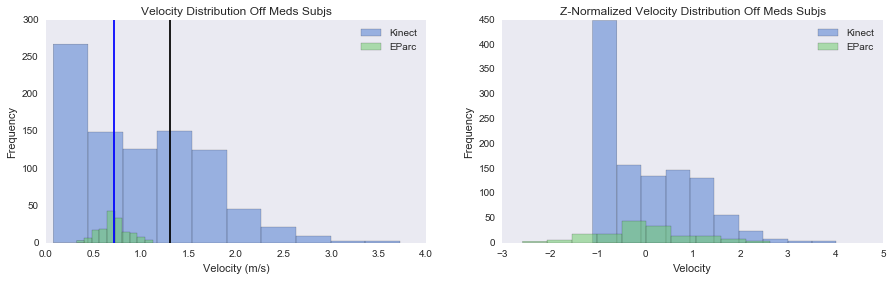

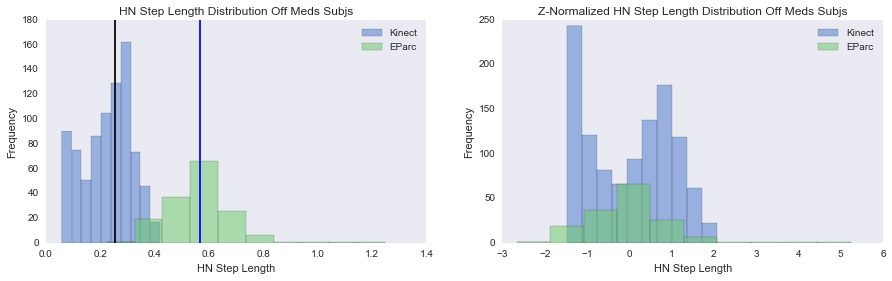

In [125]:
# kinect_steplength = reject_outliers(kinectControldf['Step Length'], 1)
kinect_steplength = kinectoffdf['Step Length'].dropna()
eparc_steplength = eparcoffdf['Step Length (cm)'].dropna() / 100

kinectvseparc_steplength = ttest_ind(a=reject_outliers(kinect_steplength, 0.5), b=eparc_steplength, equal_var=False)

## 1. Step Length
print "Independent T-test between Kinect and EParc Off Meds Step Length (P-Value): ", kinectvseparc_steplength[1]

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
reject_outliers(kinect_steplength,0.5).plot.hist(alpha=0.5)
eparc_steplength.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Length (m)')
plt.title('Step Length Distribution Off Meds Subjs')
plt.legend(['Kinect', 'EParc'])
# plt.axvline(np.mean(kinect_steplength))
# plt.axvline(np.mean(kinect_steplength) - np.std(kinect_steplength))
plt.axvline(np.mean(reject_outliers(kinect_steplength, 0.5)), color='k')
plt.axvline(np.mean(eparc_steplength), color='b')

plt.subplot(122)
z_score(kinect_steplength).plot.hist(alpha=0.5)
z_score(eparc_steplength).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Length')
plt.title('Z-Normalized Step Length Distribution Off Meds Subjs')
plt.legend(['Kinect', 'EParc'])

## 2. Velocity
kinect_velocity = kinectControldf['Velocity']
eparc_velocity = eparcControldf['Speed (cm/s)'] / 100

kinectvseparc_velocity = ttest_ind(a=reject_outliers(kinect_velocity, 0.5), b=eparc_velocity, equal_var=False)

print "Independent T-test between Kinect and EParc Off Meds Velocity (P-Value): ", kinectvseparc_velocity[1]

fig = plt.figure(figsize=(15,4))
plt.subplot(121)
reject_outliers(kinect_velocity,1).plot.hist(alpha=0.5)
eparc_velocity.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Velocity (m/s)')
plt.title('Velocity Distribution Off Meds Subjs')
plt.legend(['Kinect', 'EParc'])
plt.axvline(np.mean(reject_outliers(kinect_velocity, 0.5)), color='k')
plt.axvline(np.mean(eparc_velocity), color='b')

plt.subplot(122)
z_score(kinect_velocity).plot.hist(alpha=0.5)
z_score(eparc_velocity).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Velocity')
plt.title('Z-Normalized Velocity Distribution Off Meds Subjs')
plt.legend(['Kinect', 'EParc'])

## 3. HN Step Length
kinect_hnsteplength = kinectControldf['Hn Step Length']
eparc_hnsteplength = eparcControldf['Step Length (cm)'] / 100

kinectvseparc_hnsteplength = ttest_ind(a=reject_outliers(kinect_hnsteplength, 0.5), b=eparc_hnsteplength, equal_var=False)

print "Independent T-test between Kinect and EParc Off Meds HN SL (P-Value): ", kinectvseparc_hnsteplength[1]

kinect_plot = kinect_hnsteplength
eparc_plot = eparc_hnsteplength

fig = plt.figure(figsize=(15,4))
plt.subplot(121)
reject_outliers(kinect_plot,1).plot.hist(alpha=0.5)
eparc_plot.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('HN Step Length')
plt.title('HN Step Length Distribution Off Meds Subjs')
plt.legend(['Kinect', 'EParc'])
plt.axvline(np.mean(reject_outliers(kinect_plot, 0.5)), color='k')
plt.axvline(np.mean(eparc_plot), color='b')

plt.subplot(122)
z_score(kinect_plot).plot.hist(alpha=0.5)
z_score(eparc_plot).plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('HN Step Length')
plt.title('Z-Normalized HN Step Length Distribution Off Meds Subjs')
plt.legend(['Kinect', 'EParc'])

# 2. Correlation Analysis
Downsample kinect to length of eparc and perform correlation

It's rather difficult to perform this analysis because the time series of eparc and kinect don't match up.

In [126]:
from scipy.stats.stats import pearsonr   
from scipy.stats import ranksums

# compare step length and velocity
patients = pd.unique(kinectControldf['Patient'])

subjnames = pd.unique(eparcControldf['Subject Name']).astype(int).astype(str)

print patients
print subjnames

for patient in patients:
    patientkinectpd = kinectControldf.loc[kinectControldf['Patient'] == patient]
    patienteparcpd = eparcControldf.loc[eparcControldf['Subject Name'] == patient]
    
    eparclen = len(patienteparcpd['Step Length (cm)'])
    kinectlen = len(patientkinectpd['Step Length'])
    stepSize = int(round(kinectlen / eparclen))
#     print stepSize
#     print kinectlen
#     print eparclen
    
    randIndices = np.random.choice(kinectlen, eparclen)
#     print randIndices
    
    print patient
    print pearsonr(patientkinectpd['Step Length'][randIndices], patienteparcpd['Step Length (cm)'])
    print ttest_ind(patientkinectpd['Step Length'][randIndices], patienteparcpd['Step Length (cm)'])
    print ranksums(patientkinectpd['Step Length'][randIndices], patienteparcpd['Step Length (cm)'])
    print "\n"
#     display(patienteparcpd)
#     display(patientkinectpd['Step Length'][randIndices])
#     break

['103' '104' '105' '106' '107' '108' '109' '110' '112' '113' '114' '115'
 '117' '118' '119' '120']
['101' '103' '104' '105' '106' '107' '108' '109' '110' '112' '113' '114'
 '115' '116' '117' '118' '119' '120']
103
(0.0045304073939790327, 0.99077088769793209)
Ttest_indResult(statistic=-110.09750328490901, pvalue=1.7918040566705398e-24)
RanksumsResult(statistic=-3.5762373640756184, pvalue=0.000348575174213053)


104
(-0.10135078298511752, 0.79528910180634838)
Ttest_indResult(statistic=-21.674810718872475, pvalue=2.759756826157458e-13)
RanksumsResult(statistic=-3.5762373640756184, pvalue=0.000348575174213053)


105
(-0.43165237662755263, 0.24599298017878701)
Ttest_indResult(statistic=-22.338207424043755, pvalue=1.7286764276624224e-13)
RanksumsResult(statistic=-3.5762373640756184, pvalue=0.000348575174213053)


106
(-0.11397033634439697, 0.77032005447193597)
Ttest_indResult(statistic=-72.801485568656645, pvalue=1.3241086952267877e-21)
RanksumsResult(statistic=-3.5762373640756184, pvalue=0.

# 3. Analyzing Clinically Diff Patients
So analyze 009, 011, 016, 022

i) First analyze if there is a difference in Kinect vs EParc?
ii) Then analyze these as a group vs. controls

Since EParc, or Kinect had faulty data on some of these patients, only one to compare was 009, but nothing interesting to report.

In [127]:
# create new df's of these patients from kinect and eparc
subjs_to_analyze = ['009', '011', '016', '022']

# kinectoffdf
# kinectondf
# kinectControldf
# eparcondf
# eparcoffdf
# eparcControldf

clinsignificant_df = pd.DataFrame()

print np.unique(eparcoffdf['Subject Name'])
print np.unique(eparcondf['Subject Name'])
print np.unique(kinectondf['Patient'])
print np.unique(kinectoffdf['Patient'])

kinectoffdf[kinectoffdf['Patient'].isin(subjs_to_analyze)]
eparcoffdf[eparcoffdf['Subject Name'].isin(subjs_to_analyze)]

# loop through each subject that is clinically "different"
for subj in subjs_to_analyze:
    patkinectdf = kinectoffdf[kinectoffdf['Patient'] == subj]
    pateparcdf = eparcoffdf[eparcoffdf['Subject Name'] == subj]
    
    eparc_steplength = pateparcdf['Step Length (cm)'].dropna()/100
    kinect_steplength = patkinectdf['Step Length'].dropna()
    
    print subj
    print ttest_ind(eparc_steplength, kinect_steplength, equal_var=True)
    print ttest_ind(eparc_steplength, kinect_steplength, equal_var=False)
    print "\n"
    
    display(patkinectdf.head())
    display(pateparcdf.head())
#     break

['001' '002' '003' '005' '006' '007' '008' '009' '010' '012' '013' '014'
 '015' '016' '017' '019' '020' '021' '022']
['013' '014' '015' '016' '017' '019' '020' '021' '022']
['011' '012' '013' '014' '015' '016' '017' '020' '021' '022']
['001' '002' '003' '005' '006' '007' '008' '009' '010' '011' '012' '013'
 '014' '015' '016' '017' '018' '019' '020' '021']
009
Ttest_indResult(statistic=3.1873367355990792, pvalue=0.0017738068594983891)
Ttest_indResult(statistic=10.66757425757711, pvalue=2.2550510586019842e-17)




,Cadence,Hn Step Length,Hn Velocity,Patient,Step Length,Velocity
0,0.077274,0.206778,NaN,009,0.341391,NaN
1,0.053756,0.186617,0.497646,009,0.308105,0.821614
2,0.083994,0.108415,0.407577,009,0.178994,0.672909
3,0.070555,0.191875,0.439073,009,0.316786,0.724910
4,0.067195,0.215523,0.626521,009,0.355829,1.034386


,Subject Name,Trial,Step Width (cm),Step Length (cm),Speed (cm/s),Step Length Symmetry (%)
0,009,1,21.2,36.1,44.1,19
1,009,2,18.9,35.5,51.6,-9
2,009,3,19.8,34.5,67.7,24
3,009,4,20.4,37.0,58.7,4
4,009,5,18.0,38.5,64.6,43


011
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)




,Cadence,Hn Step Length,Hn Velocity,Patient,Step Length,Velocity
0,0.083183,0.410552,NaN,011,0.410552,NaN
1,0.074864,0.456141,1.325990,011,0.456141,1.325990
2,0.074864,0.437738,1.473866,011,0.437738,1.473866
3,0.074864,0.489078,1.421737,011,0.489078,1.421737
4,0.070705,0.405026,1.441374,011,0.405026,1.441374


,Subject Name,Trial,Step Width (cm),Step Length (cm),Speed (cm/s),Step Length Symmetry (%)


016
Ttest_indResult(statistic=4.3516841574707552, pvalue=2.6339564181937777e-05)
Ttest_indResult(statistic=3.4667157964674864, pvalue=0.0074907986723714189)




,Cadence,Hn Step Length,Hn Velocity,Patient,Step Length,Velocity
0,1.224964,0.100987,NaN,016,0.155722,NaN
1,0.967077,0.196183,0.658331,016,0.302514,1.015147
2,0.257887,0.025995,0.097727,016,0.040085,0.150695
3,0.322359,0.006377,0.081758,016,0.009834,0.126071
4,0.902605,0.025129,0.405302,016,0.038748,0.624976


,Subject Name,Trial,Step Width (cm),Step Length (cm),Speed (cm/s),Step Length Symmetry (%)
0,016,1,17.6,28.8,43.9,4
1,016,2,16.7,24.5,36.3,29
2,016,3,18.4,20.1,29.0,36
3,016,4,19.5,24.0,36.4,27
4,016,5,18.2,23.2,32.4,32


022
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)




,Cadence,Hn Step Length,Hn Velocity,Patient,Step Length,Velocity


,Subject Name,Trial,Step Width (cm),Step Length (cm),Speed (cm/s),Step Length Symmetry (%)
0,022,1,15.6,40.8,56.7,-18
1,022,2,15.5,39.8,60.4,-29
2,022,3,16.3,30.5,45.8,-56
3,022,4,17.0,29.3,49.6,-51
4,022,5,16.2,28.2,49.0,-26


## 3ii) Analyze These as a group vs Controls

In [131]:
# create new df's of these patients from kinect and eparc
subjs_to_analyze = ['009', '011', '016', '022']

# Create new data frames for these clinically significant off meds patients
clinsignificant_eparc_df = pd.DataFrame()
clinsignificant_kinect_df = pd.DataFrame()

# loop through each subject that is clinically "different"
for subj in subjs_to_analyze:
    patkinectdf = kinectoffdf[kinectoffdf['Patient'] == subj]
    pateparcdf = eparcoffdf[eparcoffdf['Subject Name'] == subj]
    
    clinsignificant_eparc_df = pd.concat([clinsignificant_eparc_df, pateparcdf])
    clinsignificant_kinect_df = pd.concat([clinsignificant_kinect_df, patkinectdf])

display(clinsignificant_eparc_df.head())
display(clinsignificant_kinect_df.head())

,Subject Name,Trial,Step Width (cm),Step Length (cm),Speed (cm/s),Step Length Symmetry (%)
0,009,1,21.2,36.1,44.1,19
1,009,2,18.9,35.5,51.6,-9
2,009,3,19.8,34.5,67.7,24
3,009,4,20.4,37.0,58.7,4
4,009,5,18.0,38.5,64.6,43


,Cadence,Hn Step Length,Hn Velocity,Patient,Step Length,Velocity
0,0.077274,0.206778,NaN,009,0.341391,NaN
1,0.053756,0.186617,0.497646,009,0.308105,0.821614
2,0.083994,0.108415,0.407577,009,0.178994,0.672909
3,0.070555,0.191875,0.439073,009,0.316786,0.724910
4,0.067195,0.215523,0.626521,009,0.355829,1.034386


Independent T-test between Ccontroltrol and Off Meds Step Length (P-Value):  2.17399726974e-08
Independent T-test between Ccontroltrol and Off Meds Velocity (P-Value):  0.000504663998645
Independent T-test between Ccontroltrol and Off Meds Cadence (P-Value):  0.818022841782
Independent T-test between Ccontroltrol and Off Meds HN Step Length (P-Value):  0.370313433628
Independent T-test between Ccontroltrol and Off Meds HN Velocity (P-Value):  0.0620308733503


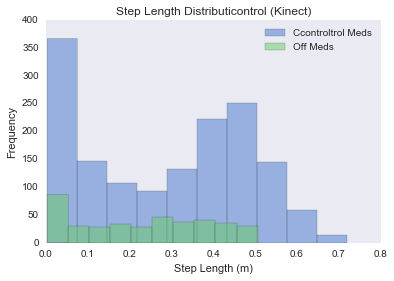

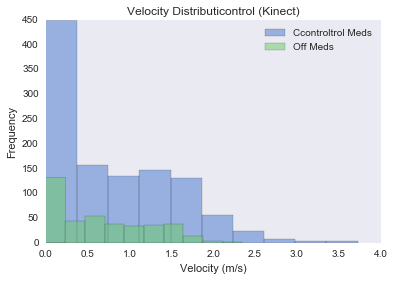

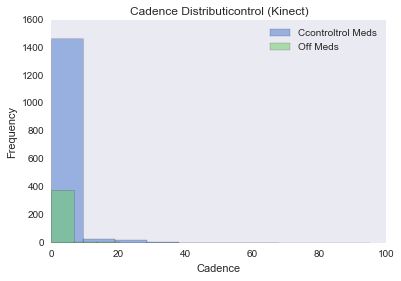

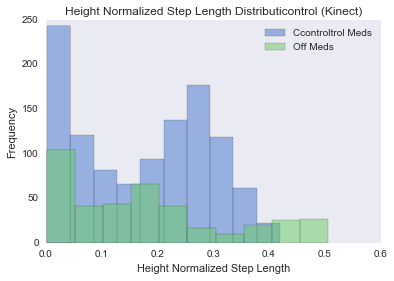

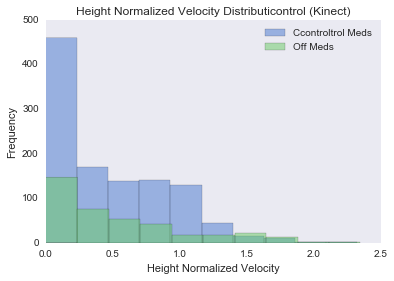

In [135]:
'''
Compare clinically significant off patients to controls on Kinect
'''

offkinectdf = clinsignificant_kinect_df
controlkinectdf = kinectControldf

# Step Length
controlsteplength = controlkinectdf['Step Length'].dropna()
offsteplength = offkinectdf['Step Length'].dropna()
controlvsoff_steplength = ttest_ind(a=controlsteplength, b=offsteplength)

fig = plt.figure()
controlsteplength.plot.hist(alpha=0.5)
offsteplength.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Length (m)')
plt.title('Step Length Distributicontrol (Kinect)')
plt.legend(['Ccontroltrol Meds', 'Off Meds'])

print "Independent T-test between Ccontroltrol and Off Meds Step Length (P-Value): ", controlvsoff_steplength[1]

# Velocity
controlvelocity = controlkinectdf['Velocity'].dropna()
offvelocity = offkinectdf['Velocity'].dropna()
controlvsoff_velocity = ttest_ind(a=controlvelocity, b=offvelocity)

fig = plt.figure()
controlvelocity.plot.hist(alpha=0.5)
offvelocity.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Velocity (m/s)')
plt.title('Velocity Distributicontrol (Kinect)')
plt.legend(['Ccontroltrol Meds', 'Off Meds'])

print "Independent T-test between Ccontroltrol and Off Meds Velocity (P-Value): ", controlvsoff_velocity[1]

# Cadence
controlcadence = controlkinectdf['Cadence'].dropna()
offcadence = offkinectdf['Cadence'].dropna()
controlvsoff_cadence = ttest_ind(a=controlcadence, b=offcadence)

fig = plt.figure()
controlcadence.plot.hist(alpha=0.5)
offcadence.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Cadence')
plt.title('Cadence Distributicontrol (Kinect)')
plt.legend(['Ccontroltrol Meds', 'Off Meds'])

print "Independent T-test between Ccontroltrol and Off Meds Cadence (P-Value): ", controlvsoff_cadence[1]

## Height Normalized
# HN Step Length
controlhnsteplength = controlkinectdf['Hn Step Length'].dropna()
offhnsteplength = offkinectdf['Hn Step Length'].dropna()
controlvsoff_hnsteplength = ttest_ind(a=controlhnsteplength, b=offhnsteplength)

fig = plt.figure()
controlhnsteplength.plot.hist(alpha=0.5)
offhnsteplength.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Height Normalized Step Length')
plt.title('Height Normalized Step Length Distributicontrol (Kinect)')
plt.legend(['Ccontroltrol Meds', 'Off Meds'])

print "Independent T-test between Ccontroltrol and Off Meds HN Step Length (P-Value): ", controlvsoff_hnsteplength[1]

# HN Velocity
controlhnvelocity = controlkinectdf['Hn Velocity'].dropna()
offhnvelocity = offkinectdf['Hn Velocity'].dropna()
controlvsoff_hnvelocity = ttest_ind(a=controlhnvelocity, b=offhnvelocity)

fig = plt.figure()
controlhnvelocity.plot.hist(alpha=0.5)
offhnvelocity.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Height Normalized Velocity')
plt.title('Height Normalized Velocity Distributicontrol (Kinect)')
plt.legend(['Ccontroltrol Meds', 'Off Meds'])

print "Independent T-test between Ccontroltrol and Off Meds HN Velocity (P-Value): ", controlvsoff_hnvelocity[1]

Independent T-test between Controls and Off Meds Step Width (P-Value):  0.0781596070802
Independent T-test between Controls and Off Meds Step Length (P-Value):  2.17326252161e-16
Independent T-test between Controls and Off Meds Speed (P-Value):  2.14345639071e-11
Independent T-test between Control and Off Meds Step Symmetry (P-Value):  0.182236440746


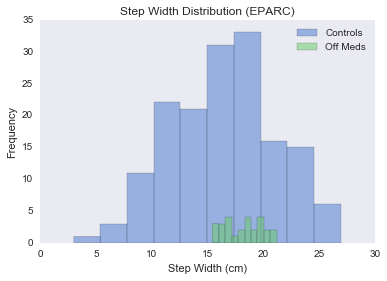

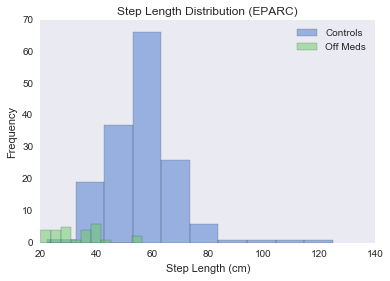

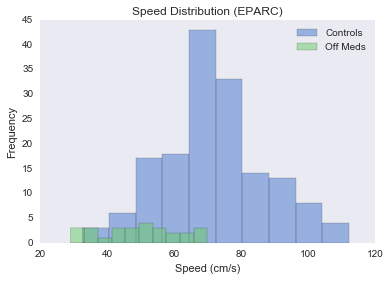

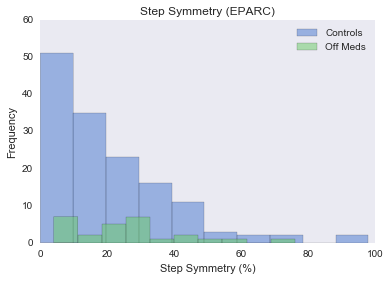

In [137]:
'''
Compare in Eparc
'''
controleparcdf = eparcControldf
offeparcdf = clinsignificant_eparc_df

# Step Width
controlstepwidth = controleparcdf['Step Width (cm)'].dropna()
offstepwidth = offeparcdf['Step Width (cm)'].dropna()
controlvsoff_stepwidth = ttest_ind(a=controlstepwidth, b=offstepwidth)

fig = plt.figure()
controlstepwidth.plot.hist(alpha=0.5)
offstepwidth.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Width (cm)')
plt.title('Step Width Distribution (EPARC)')
plt.legend(['Controls', 'Off Meds'])

print "Independent T-test between Controls and Off Meds Step Width (P-Value): ", controlvsoff_stepwidth[1]

# Step Length
controlsteplength = controleparcdf['Step Length (cm)'].dropna()
offsteplength = offeparcdf['Step Length (cm)'].dropna()
controlvsoff_steplength = ttest_ind(a=controlsteplength, b=offsteplength)

fig = plt.figure()
controlsteplength.plot.hist(alpha=0.5)
offsteplength.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Length (cm)')
plt.title('Step Length Distribution (EPARC)')
plt.legend(['Controls', 'Off Meds'])

print "Independent T-test between Controls and Off Meds Step Length (P-Value): ", controlvsoff_steplength[1]

# Speed
controlspeed = controleparcdf['Speed (cm/s)'].dropna()
offspeed = offeparcdf['Speed (cm/s)'].dropna()
controlvsoff_speed = ttest_ind(a=controlspeed, b=offspeed)

fig = plt.figure()
controlspeed.plot.hist(alpha=0.5)
offspeed.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Speed (cm/s)')
plt.title('Speed Distribution (EPARC)')
plt.legend(['Controls', 'Off Meds'])

print "Independent T-test between Controls and Off Meds Speed (P-Value): ", controlvsoff_speed[1]


# Step Symmetrcy
controlstepsym = abs(controleparcdf['Step Length Symmetry (%)'].dropna())
offstepsym = abs(offeparcdf['Step Length Symmetry (%)'].dropna())

controlstepsym = controlstepsym[controlstepsym < 100]
offstepsym = offstepsym[offstepsym < 100]
controlvsoff_stepsym = ttest_ind(a=controlstepsym, b=offstepsym)

fig = plt.figure()
controlstepsym.plot.hist(alpha=0.5)
offstepsym.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Step Symmetry (%)')
plt.title('Step Symmetry (EPARC)')
plt.legend(['Controls', 'Off Meds'])

print "Independent T-test between Control and Off Meds Step Symmetry (P-Value): ", controlvsoff_stepsym[1]


## 3 Discussion

In EParc, the most significant measure between controls and the significantly different clinical patients was step length and speed. We see that also in Kinect. This suggests that the Kinect has some way of measuring clinical differences in patients.